In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation:

In [2]:
df = pd.read_csv("bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
df.shape

(4521, 17)

In [4]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

there is no duplicated or null value

# EDA

In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [9]:
df.nunique()

age            67
job            12
marital         3
education       4
default         2
balance      2353
housing         2
loan            2
contact         3
day            31
month          12
duration      875
campaign       32
pdays         292
previous       24
poutcome        4
y               2
dtype: int64

In [10]:
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

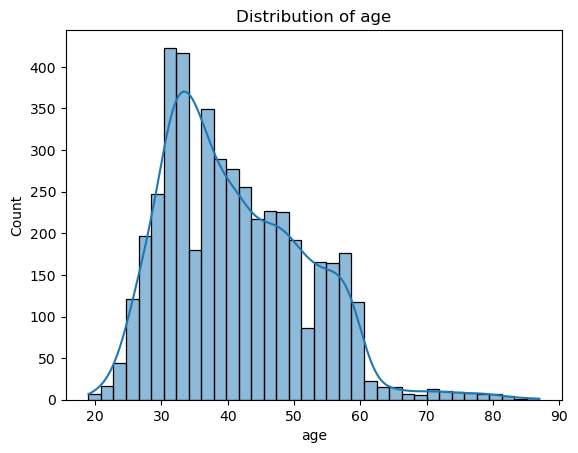

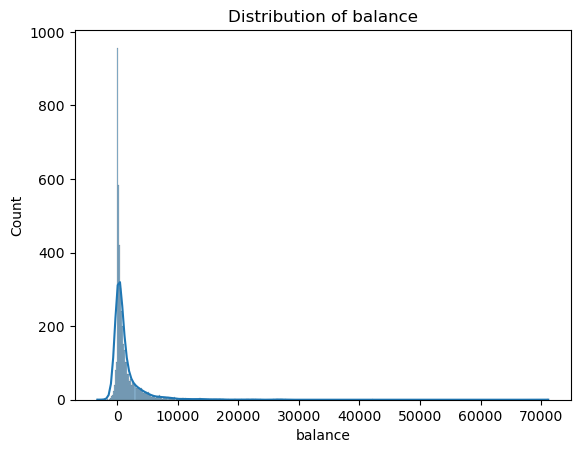

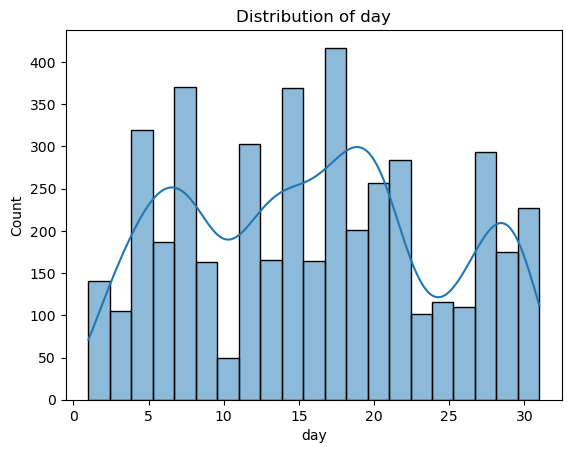

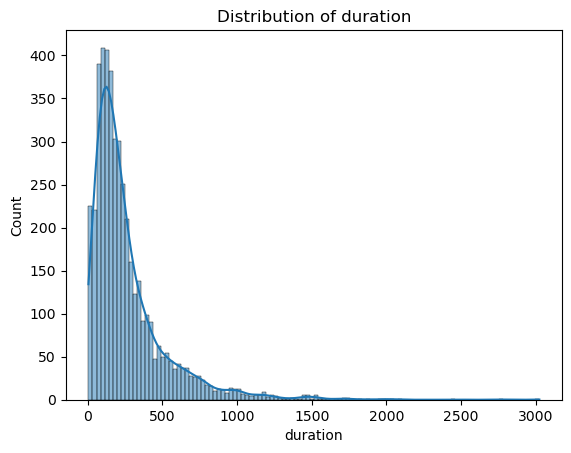

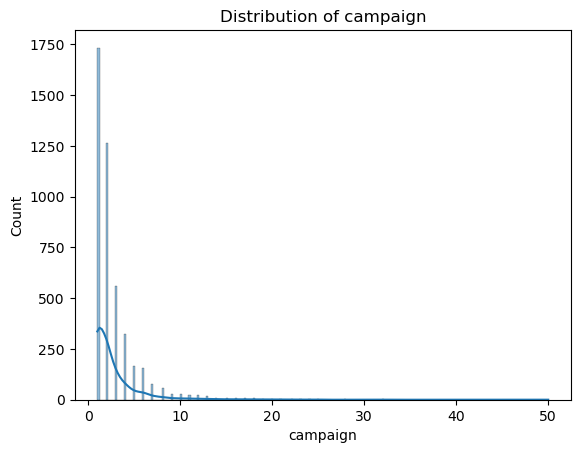

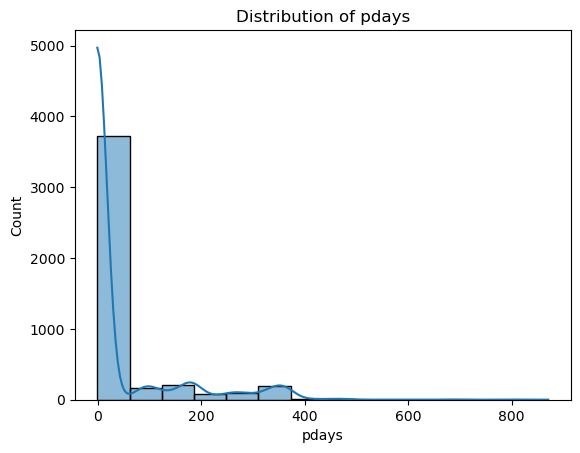

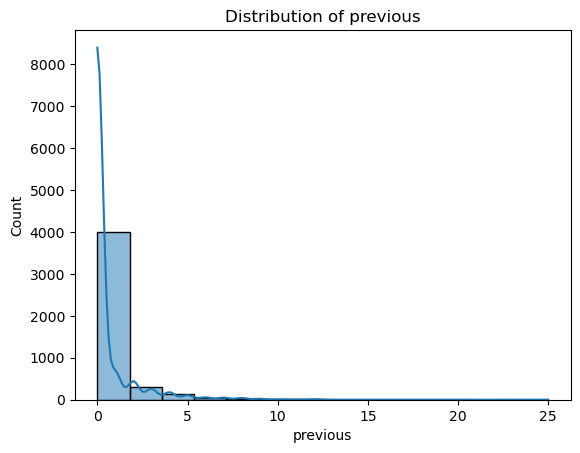

In [11]:
for col in numerical_columns:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64 



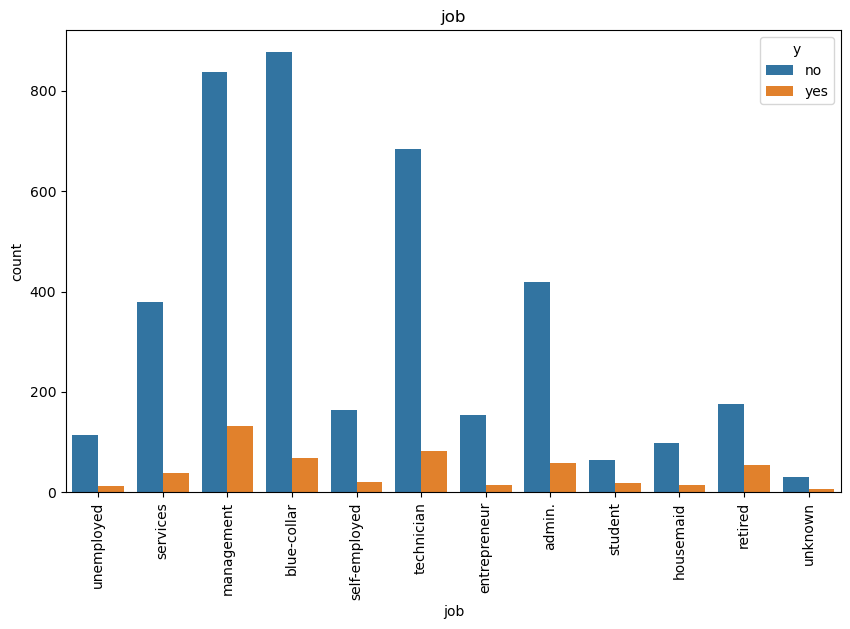

married     2797
single      1196
divorced     528
Name: marital, dtype: int64 



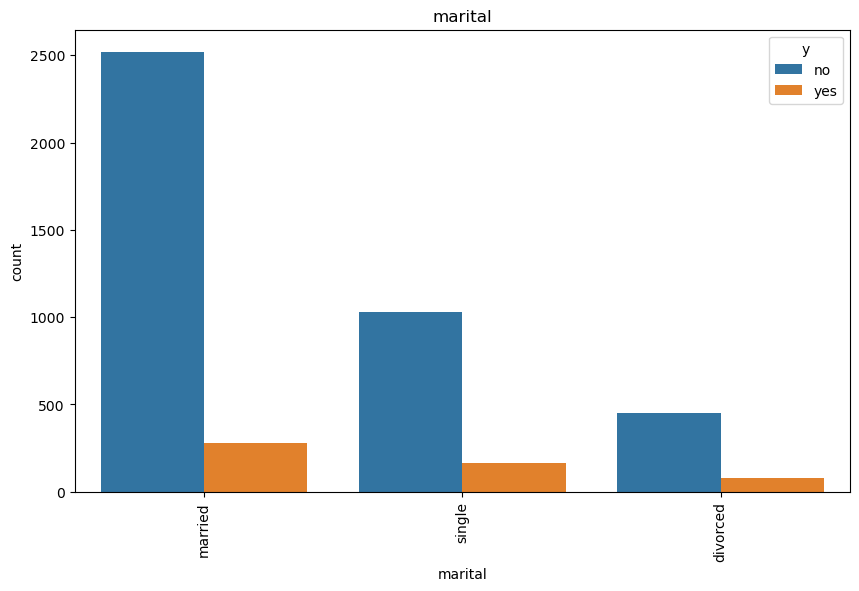

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64 



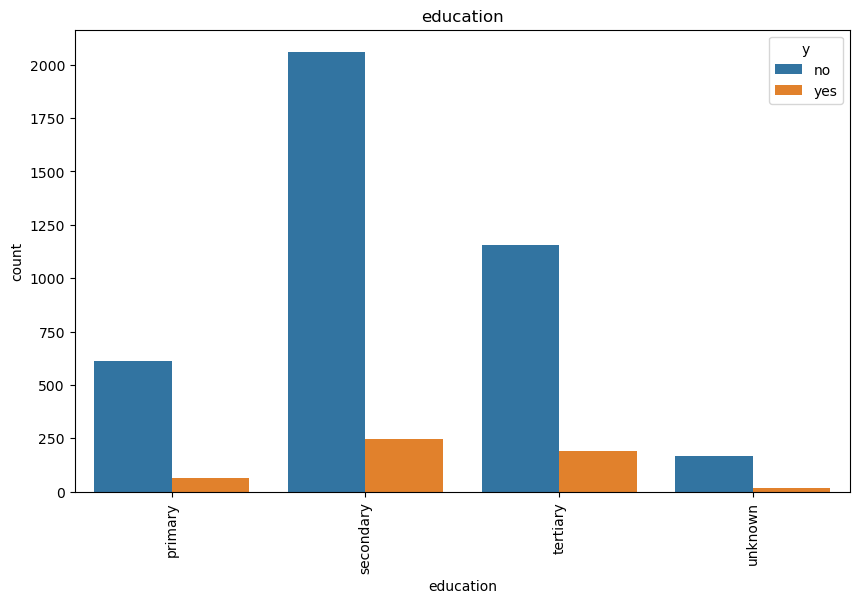

no     4445
yes      76
Name: default, dtype: int64 



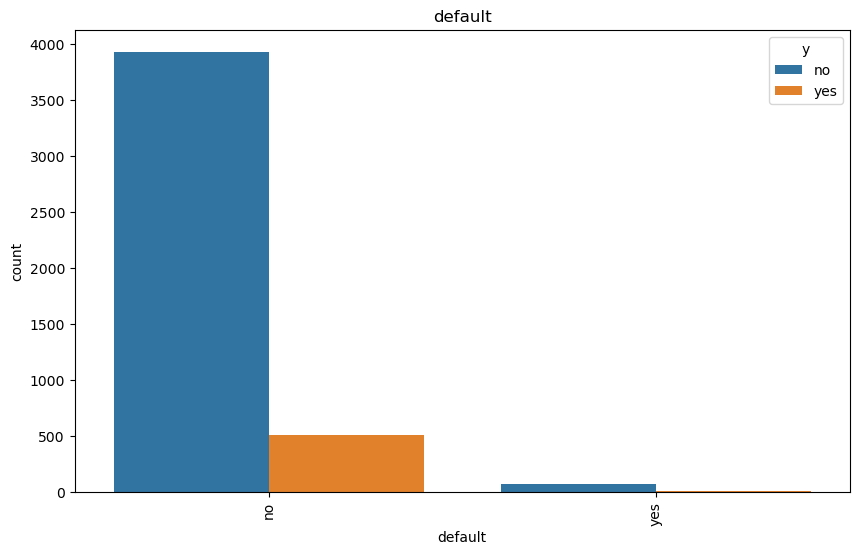

yes    2559
no     1962
Name: housing, dtype: int64 



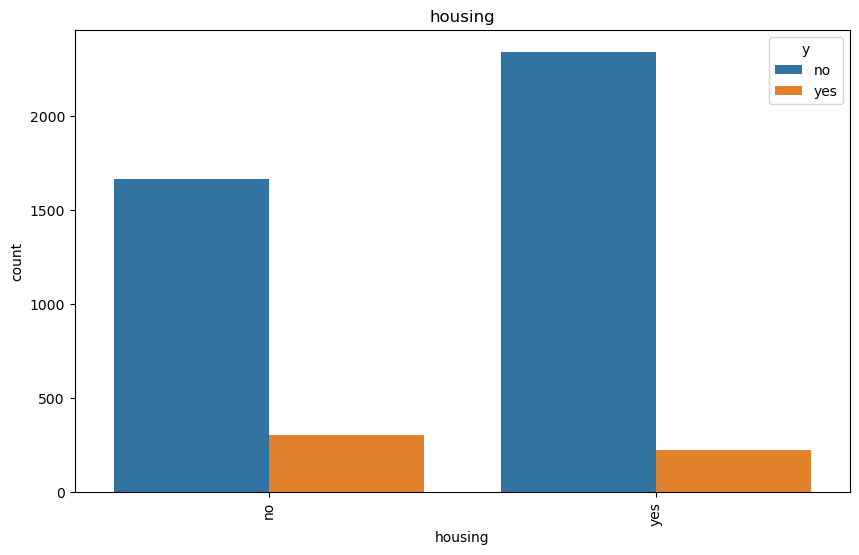

no     3830
yes     691
Name: loan, dtype: int64 



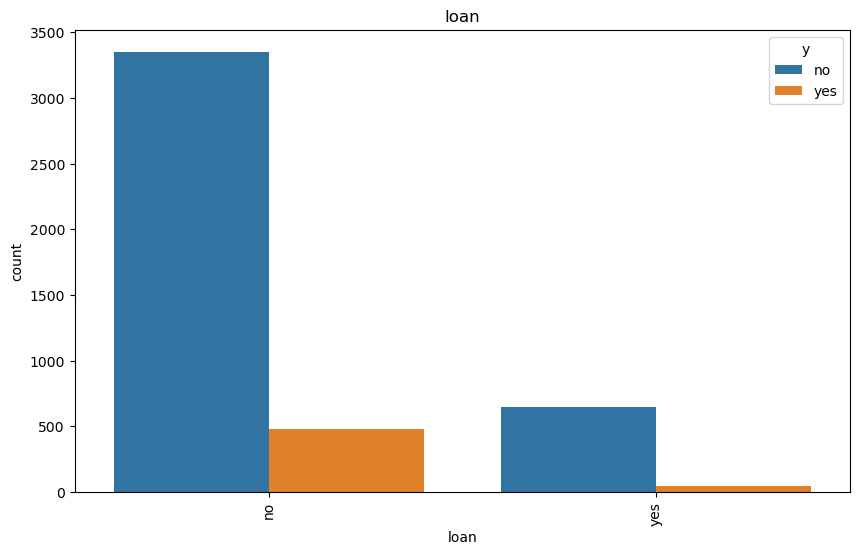

cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64 



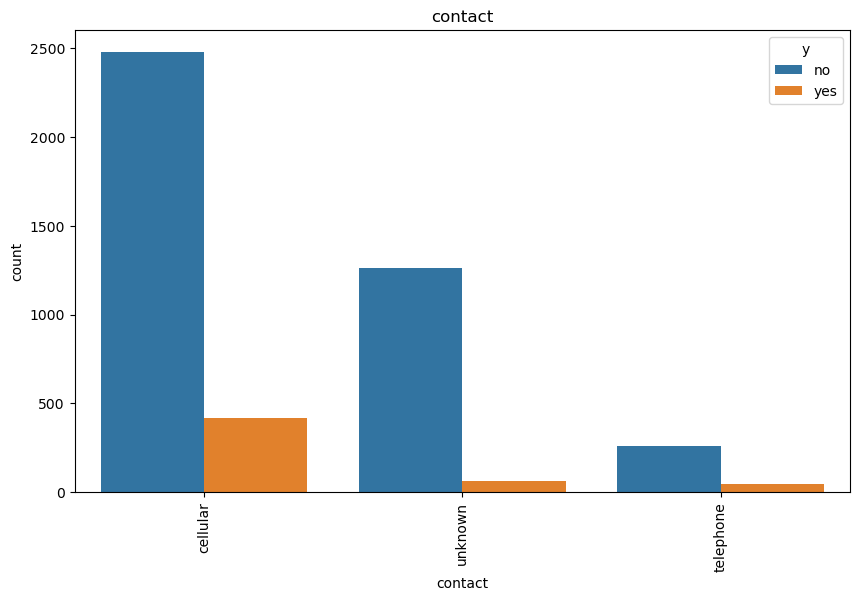

may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: month, dtype: int64 



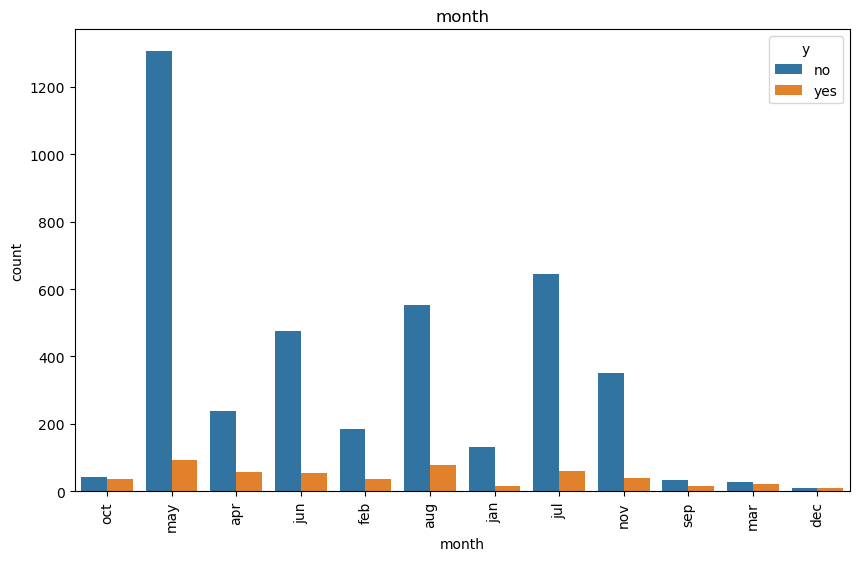

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64 



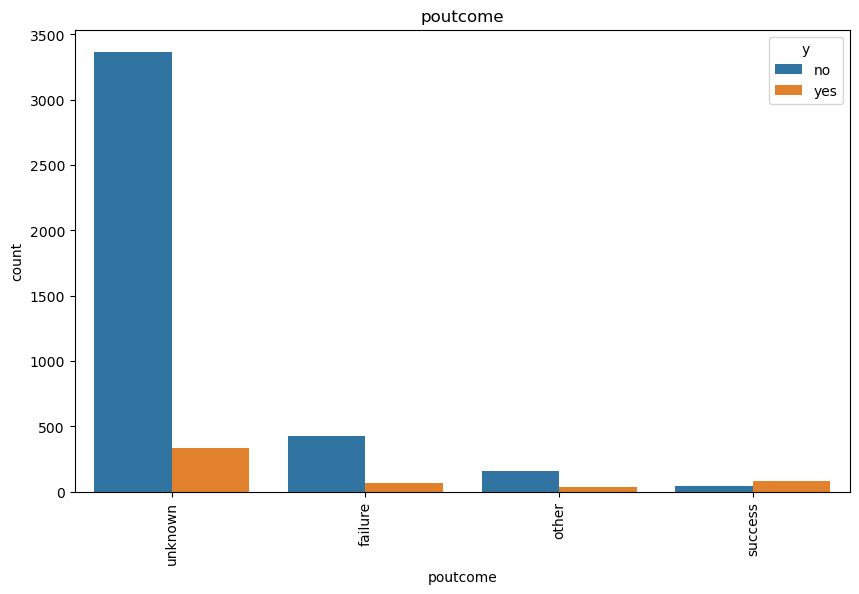

no     4000
yes     521
Name: y, dtype: int64 



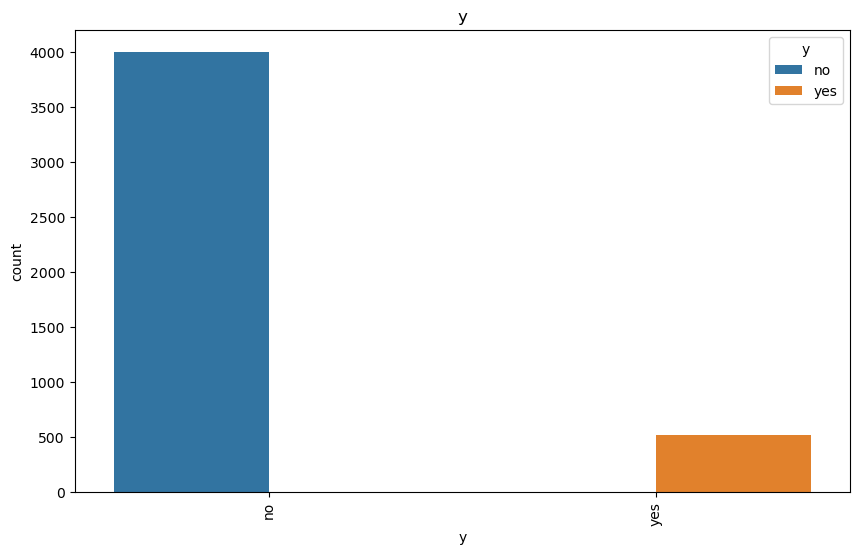

In [12]:
for column in categorical_columns:
    print(df[column].value_counts() , '\n')
    plt.figure(figsize=(10, 6))  
    sns.countplot(x=column, data=df , hue = 'y')
    plt.xticks(rotation=90)  
    plt.title(column)  
    plt.show()

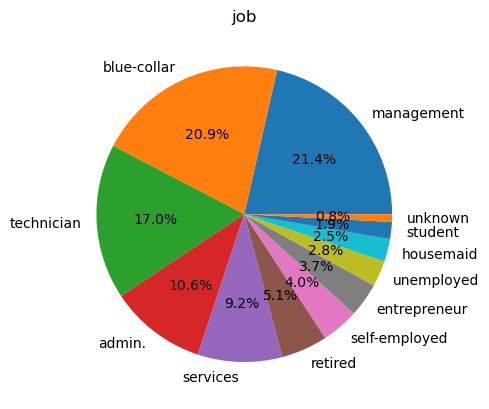

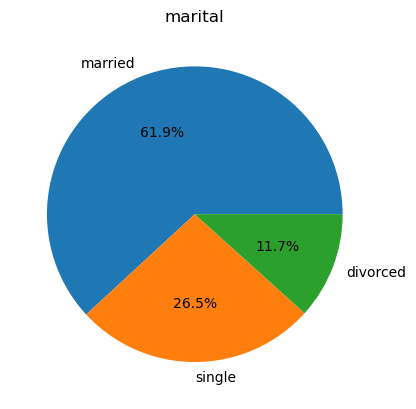

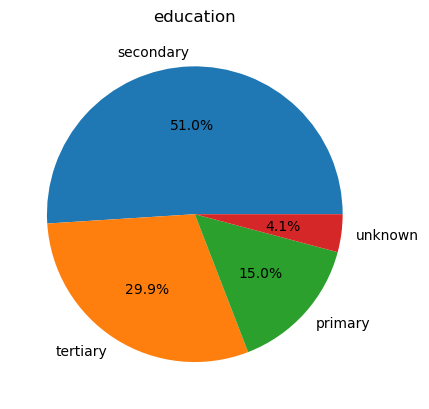

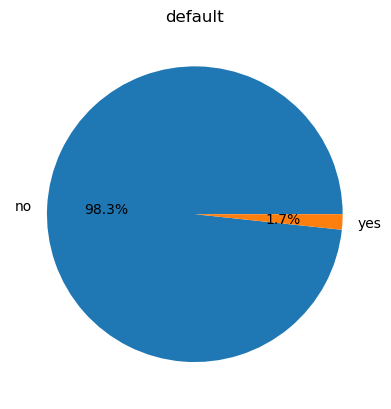

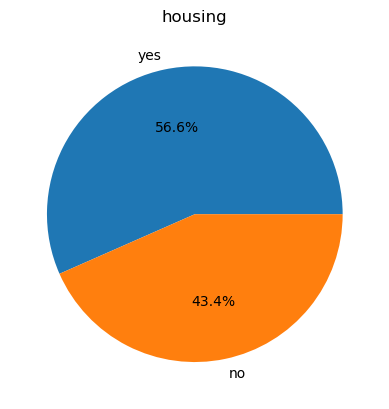

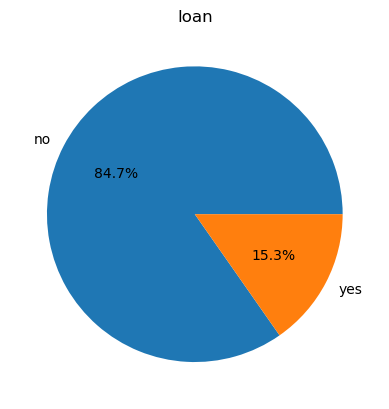

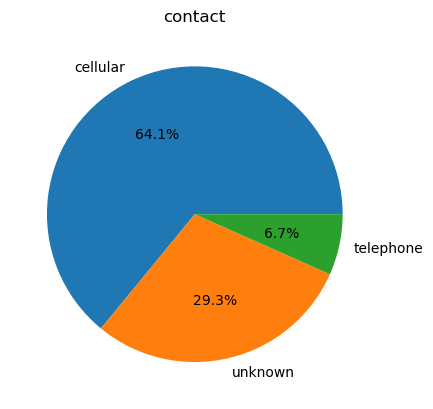

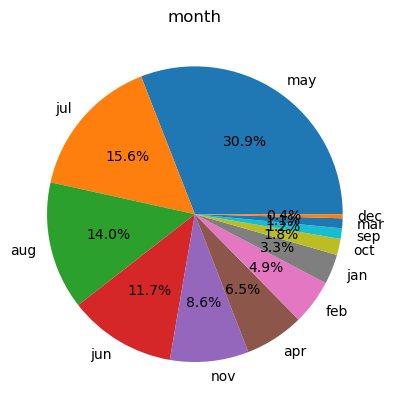

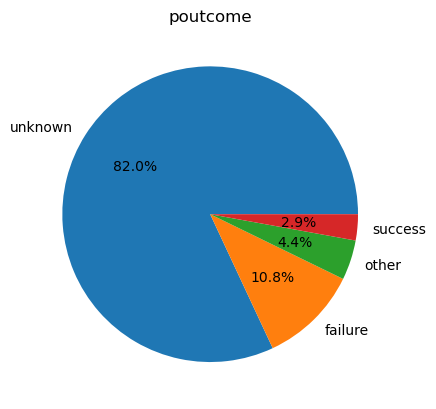

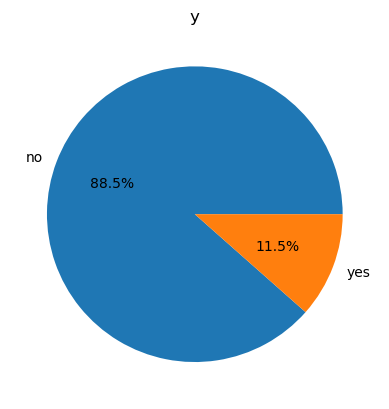

In [13]:
for column in categorical_columns:
    perceage = (df[column].value_counts() * 100) / len(df)
    values = df[column].value_counts().values
    labels = df[column].value_counts().index
    plt.pie(values, labels=labels, autopct='%1.1f%%')
    plt.title(column)  
    plt.show()

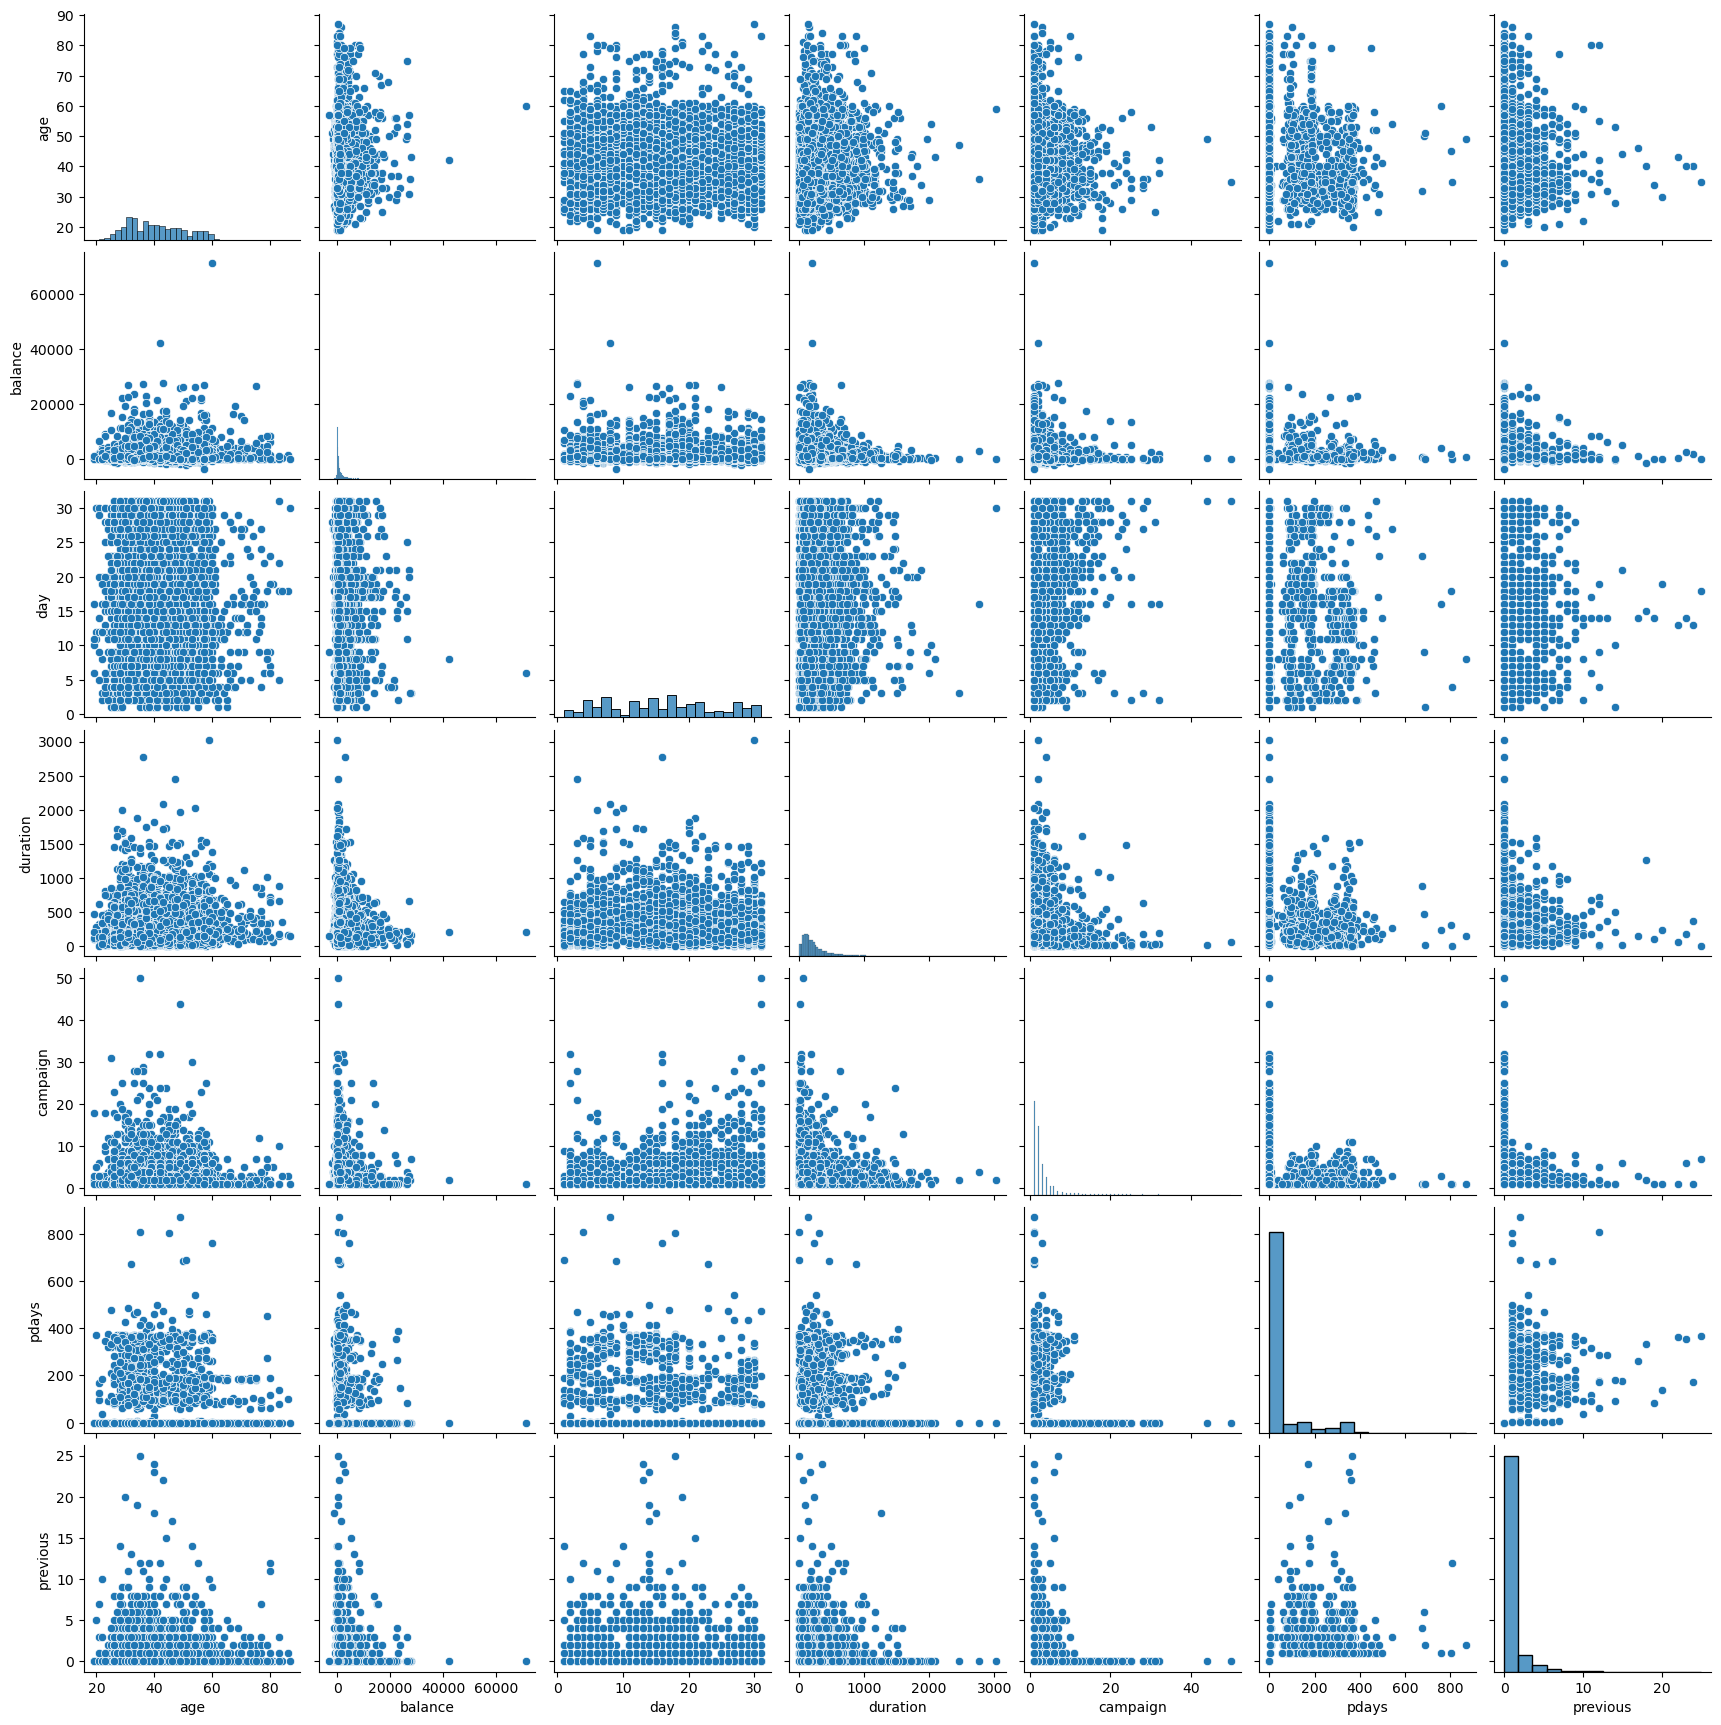

C:\Users\User\AppData\Local\Temp\ipykernel_12556\2825339444.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000


In [14]:
sns.pairplot(df[numerical_columns])
plt.show()
df.corr()

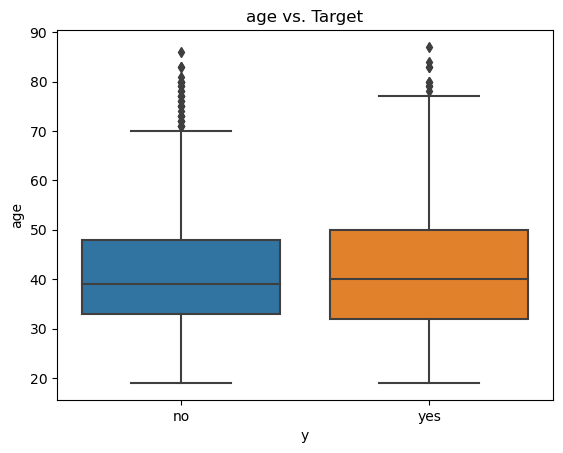

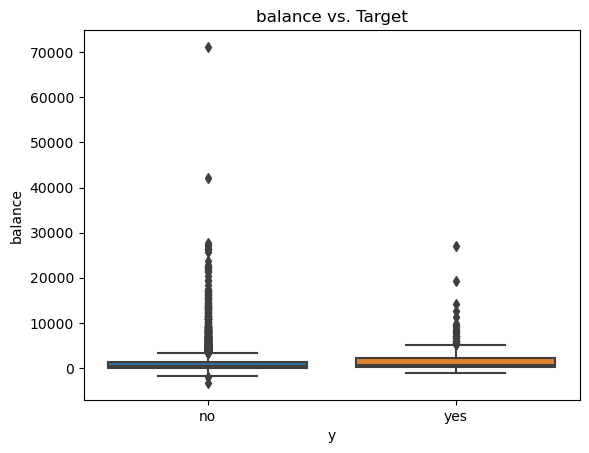

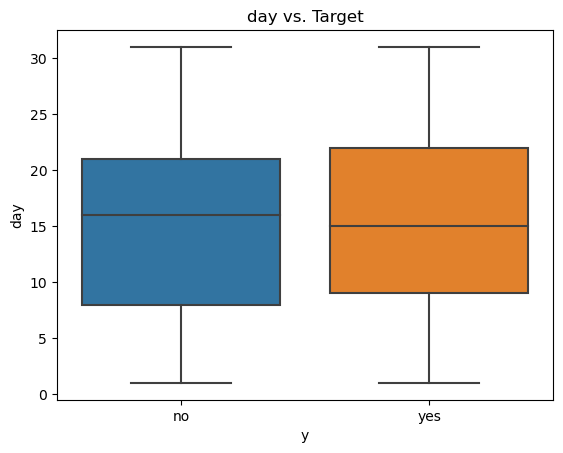

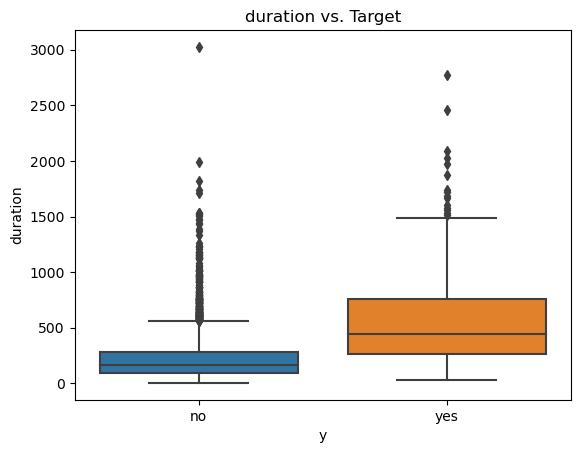

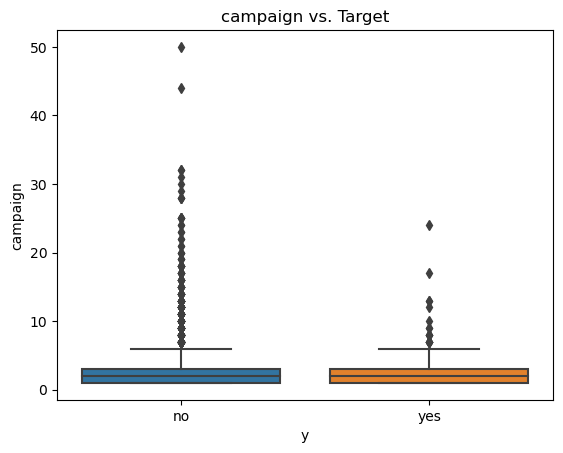

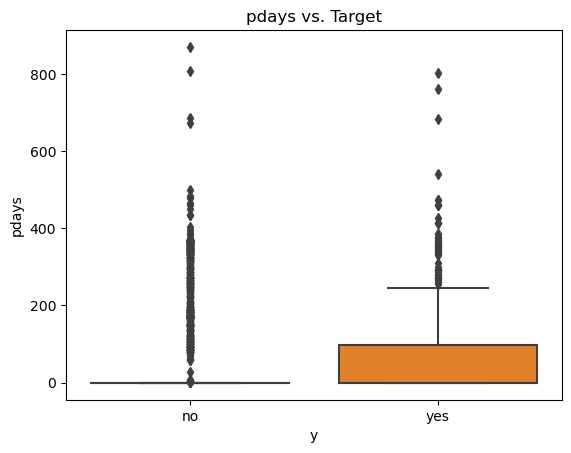

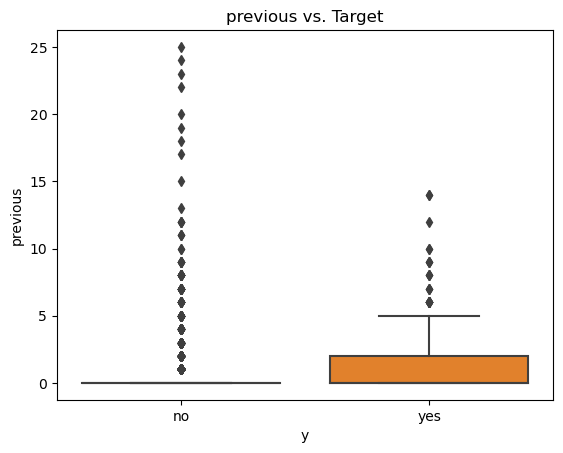

In [15]:
for col in numerical_columns:
    sns.boxplot(x='y', y=col, data=df)
    plt.title(f'{col} vs. Target')
    plt.show()

In [16]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


# Label encoding

In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [18]:
y = pd.get_dummies(df["y"],drop_first=True)
loan = pd.get_dummies(df["loan"],drop_first=True)
housing = pd.get_dummies(df["housing"],drop_first=True)

In [19]:
label_encoder = LabelEncoder()

df["poutcome_encoded"] = label_encoder.fit_transform(df["poutcome"])

print("Mapping of original categories to encoded values:")
for original, encoded in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{original}: {encoded}")

Mapping of original categories to encoded values:
failure: 0
other: 1
success: 2
unknown: 3


In [20]:
df["education_encoded"] = label_encoder.fit_transform(df["education"])

print("Mapping of original categories to encoded values:")
for original, encoded in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{original}: {encoded}")

Mapping of original categories to encoded values:
primary: 0
secondary: 1
tertiary: 2
unknown: 3


In [22]:
df["y"] = y
df["loan"] = loan
df["housing"] = housing
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,poutcome_encoded,education_encoded
0,30,unemployed,married,primary,no,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0,3,0
1,33,services,married,secondary,no,4789,1,1,cellular,11,may,220,1,339,4,failure,0,0,1
2,35,management,single,tertiary,no,1350,1,0,cellular,16,apr,185,1,330,1,failure,0,0,2
3,30,management,married,tertiary,no,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0,3,2
4,59,blue-collar,married,secondary,no,0,1,0,unknown,5,may,226,1,-1,0,unknown,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,1,0,cellular,30,jul,329,5,-1,0,unknown,0,3,1
4517,57,self-employed,married,tertiary,yes,-3313,1,1,unknown,9,may,153,1,-1,0,unknown,0,3,2
4518,57,technician,married,secondary,no,295,0,0,cellular,19,aug,151,11,-1,0,unknown,0,3,1
4519,28,blue-collar,married,secondary,no,1137,0,0,cellular,6,feb,129,4,211,3,other,0,1,1


In [23]:
df.drop(["job","marital","education","default","poutcome","contact","month"],axis=1,inplace=True)
df

,age,balance,housing,loan,day,duration,campaign,pdays,previous,y,poutcome_encoded,education_encoded
0,30,1787,0,0,19,79,1,-1,0,0,3,0
1,33,4789,1,1,11,220,1,339,4,0,0,1
2,35,1350,1,0,16,185,1,330,1,0,0,2
3,30,1476,1,1,3,199,4,-1,0,0,3,2
4,59,0,1,0,5,226,1,-1,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,1,0,30,329,5,-1,0,0,3,1
4517,57,-3313,1,1,9,153,1,-1,0,0,3,2
4518,57,295,0,0,19,151,11,-1,0,0,3,1
4519,28,1137,0,0,6,129,4,211,3,0,1,1


In [24]:
X = df.drop('y' ,axis = 1)
y = df['y']
key=X.keys()

# Scaling the input data:

In [25]:
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X , columns=key)
X

,age,balance,housing,loan,day,duration,campaign,pdays,previous,poutcome_encoded,education_encoded
0,-1.056270,0.121072,-1.142051,-0.424756,0.374052,-0.711861,-0.576829,-0.407218,-0.320413,0.444413,-1.644755
1,-0.772583,1.118644,0.875617,2.354292,-0.596026,-0.169194,-0.576829,2.989044,2.041734,-2.579961,-0.309038
2,-0.583458,-0.024144,0.875617,-0.424756,0.010273,-0.303898,-0.576829,2.899143,0.270124,-2.579961,1.026680
3,-1.056270,0.017726,0.875617,2.354292,-1.566105,-0.250017,0.387967,-0.407218,-0.320413,0.444413,1.026680
4,1.686036,-0.472753,0.875617,-0.424756,-1.323585,-0.146102,-0.576829,-0.407218,-0.320413,0.444413,-0.309038
...,...,...,...,...,...,...,...,...,...,...,...
4516,-0.772583,-0.583410,0.875617,-0.424756,1.707910,0.250315,0.709566,-0.407218,-0.320413,0.444413,-0.309038
4517,1.496912,-1.573671,0.875617,2.354292,-0.838546,-0.427057,-0.576829,-0.407218,-0.320413,0.444413,1.026680
4518,1.496912,-0.374724,-1.142051,-0.424756,0.374052,-0.434754,2.639160,-0.407218,-0.320413,0.444413,-0.309038
4519,-1.245394,-0.094925,-1.142051,-0.424756,-1.202326,-0.519426,0.387967,1.710451,1.451197,-1.571836,-0.309038


# Splitting into Test and Train dataset:

In [26]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=33)
print('X_train shape',X_train.shape)
print('X_test shape',X_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

X_train shape (3616, 11)
X_test shape (905, 11)
y_train shape (3616,)
y_test shape (905,)


# Building model:

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
model = Sequential()

model.add(Dense(128 , activation='relu' , input_dim = X.shape[1]))
model.add(Dense(32 , activation='relu' ))
model.add(Dense(1 , activation='sigmoid'))

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,697 (22.25 KB)

 Trainable params: 5,697 (22.25 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(loss = 'binary_crossentropy' ,  optimizer='adam', metrics=['accuracy'])

# Fitting model:

In [35]:
history = model.fit(X_train , y_train , epochs=20 , batch_size=32 , validation_data=(X_test, y_test))

Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9252 - loss: 0.1919 - val_accuracy: 0.8729 - val_loss: 0.3023
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9281 - loss: 0.1903 - val_accuracy: 0.8796 - val_loss: 0.3123
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9250 - loss: 0.1925 - val_accuracy: 0.8829 - val_loss: 0.3045
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9256 - loss: 0.1855 - val_accuracy: 0.8773 - val_loss: 0.3036
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9276 - loss: 0.1875 - val_accuracy: 0.8829 - val_loss: 0.3110
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9337 - loss: 0.1824 - val_accuracy: 0.8818 - val_loss: 0.3169
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9283 - loss: 0.1895 - val_accuracy: 0.8851 - val_loss: 0.3116
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9312 - loss: 0.1670 - val_accuracy: 0.

# Evaluation the results of model with Test dataset:

In [36]:
loss,acc=model.evaluate(X_test,y_test)
print('Test Loss :',loss)
print('Test accuracy :',acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8785 - loss: 0.3345
Test Loss : 0.32413744926452637
Test accuracy : 0.8817679286003113


In [37]:
history = pd.DataFrame(history.history)
history

,accuracy,loss,val_accuracy,val_loss
0,0.922290,0.196939,0.872928,0.302302
1,0.922290,0.198257,0.879558,0.312273
2,0.928097,0.192557,0.882873,0.304517
3,0.924502,0.190227,0.877348,0.303632
4,0.925332,0.188946,0.882873,0.310987
5,0.929480,0.186921,0.881768,0.316886
6,0.928927,0.182363,0.885083,0.311550
7,0.927268,0.183864,0.883978,0.310522
8,0.927268,0.182829,0.881768,0.328053
9,0.929204,0.179052,0.879558,0.324697


In [39]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = (model.predict(X_test) > 0.5).astype("int32")

print(classification_report(y_test, y_pred))

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       784
           1       0.58      0.43      0.49       121

    accuracy                           0.88       905
   macro avg       0.75      0.69      0.71       905
weighted avg       0.87      0.88      0.87       905



# Prediction and Clustering

In [41]:
y_probs = model.predict(X)

df['predicted_prob'] = y_probs

142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


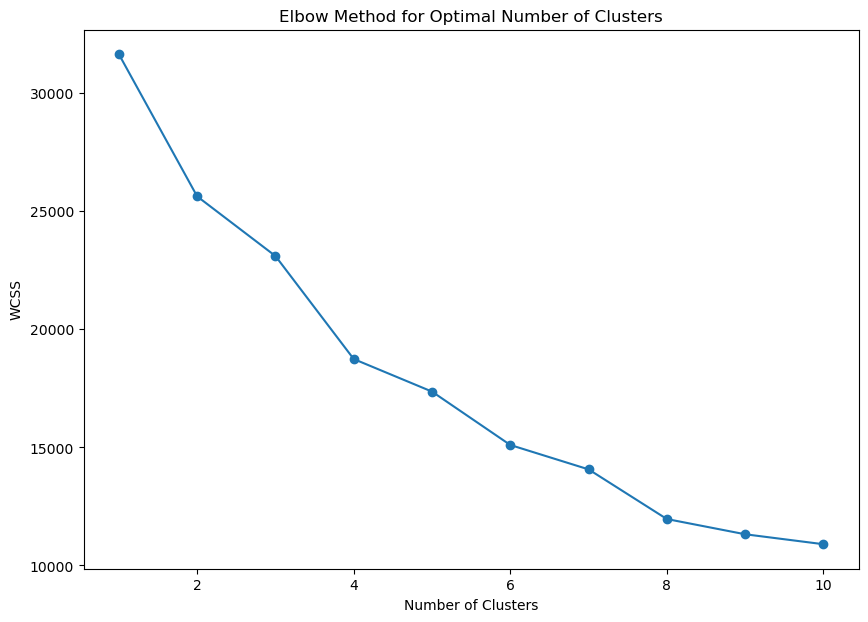

In [44]:
from sklearn.cluster import KMeans
features_for_clustering = ['predicted_prob', 'age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

scaler = StandardScaler()
normalized_features = scaler.fit_transform(df[features_for_clustering])

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(normalized_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 7))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()    

In [45]:
optimal_clusters = 6
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(normalized_features)

df['cluster'] = clusters

In [46]:
df

,age,balance,housing,loan,day,duration,campaign,pdays,previous,y,poutcome_encoded,education_encoded,predicted_prob,cluster
0,30,1787,0,0,19,79,1,-1,0,0,3,0,0.024410,0
1,33,4789,1,1,11,220,1,339,4,0,0,1,0.003256,3
2,35,1350,1,0,16,185,1,330,1,0,0,2,0.041206,3
3,30,1476,1,1,3,199,4,-1,0,0,3,2,0.000097,0
4,59,0,1,0,5,226,1,-1,0,0,3,1,0.057563,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,1,0,30,329,5,-1,0,0,3,1,0.030156,0
4517,57,-3313,1,1,9,153,1,-1,0,0,3,2,0.000086,0
4518,57,295,0,0,19,151,11,-1,0,0,3,1,0.000084,1
4519,28,1137,0,0,6,129,4,211,3,0,1,1,0.052255,3


# Analyze Segments

In [52]:
cluster_summary = df.groupby('cluster').mean()

cluster_counts = df['cluster'].value_counts()

In [53]:
cluster_summary

,age,balance,housing,loan,day,duration,campaign,pdays,previous,y,poutcome_encoded,education_encoded,predicted_prob
cluster,,,,,,,,,,,,,
0,40.850616,902.213221,0.560272,0.165911,16.046014,198.755023,2.374919,1.056708,0.034997,0.042126,2.941672,1.221970,0.056033
1,40.723529,996.623529,0.547059,0.194118,21.100000,152.076471,14.547059,-1.000000,0.000000,0.011765,3.000000,1.241176,0.014320
2,42.612663,1396.424581,0.450652,0.102421,15.618250,736.733706,2.322160,44.841713,0.689013,0.599628,2.506518,1.238361,0.618337
3,40.847780,982.312896,0.758985,0.139535,13.930233,210.272727,2.067653,275.298097,2.279070,0.080338,0.325581,1.211416,0.102103
4,40.390805,1538.333333,0.597701,0.172414,13.931034,275.551724,2.057471,196.149425,9.425287,0.229885,0.701149,1.310345,0.272519
5,44.190476,12677.565476,0.500000,0.059524,15.833333,208.928571,2.523810,31.744048,0.458333,0.053571,2.505952,1.386905,0.087093


In [54]:
cluster_counts

0    3086
2     537
3     473
1     170
5     168
4      87
Name: cluster, dtype: int64

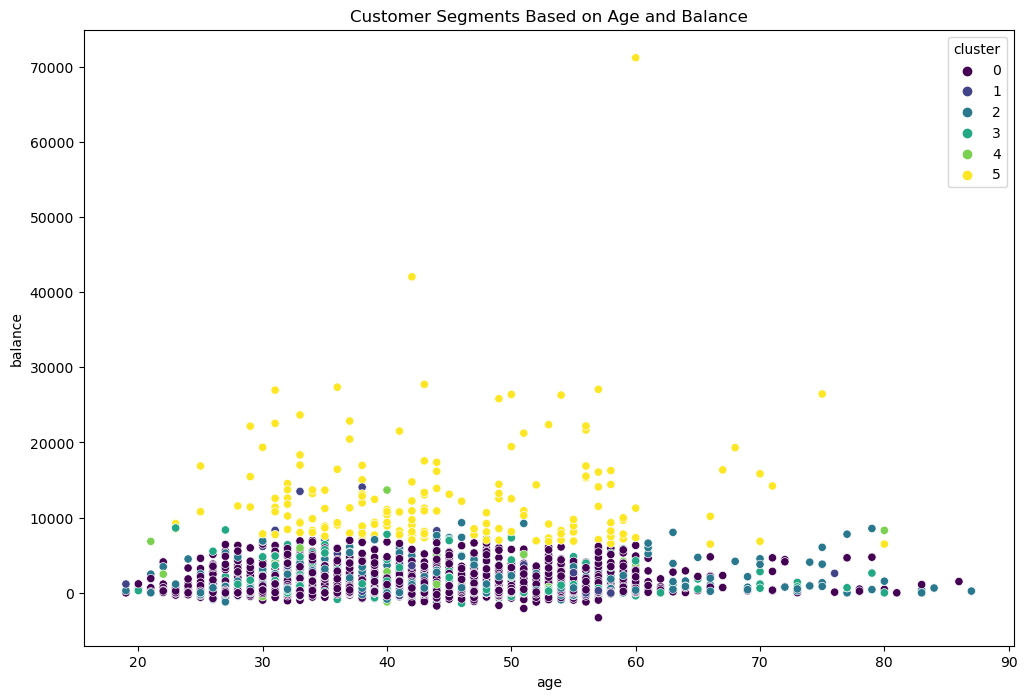

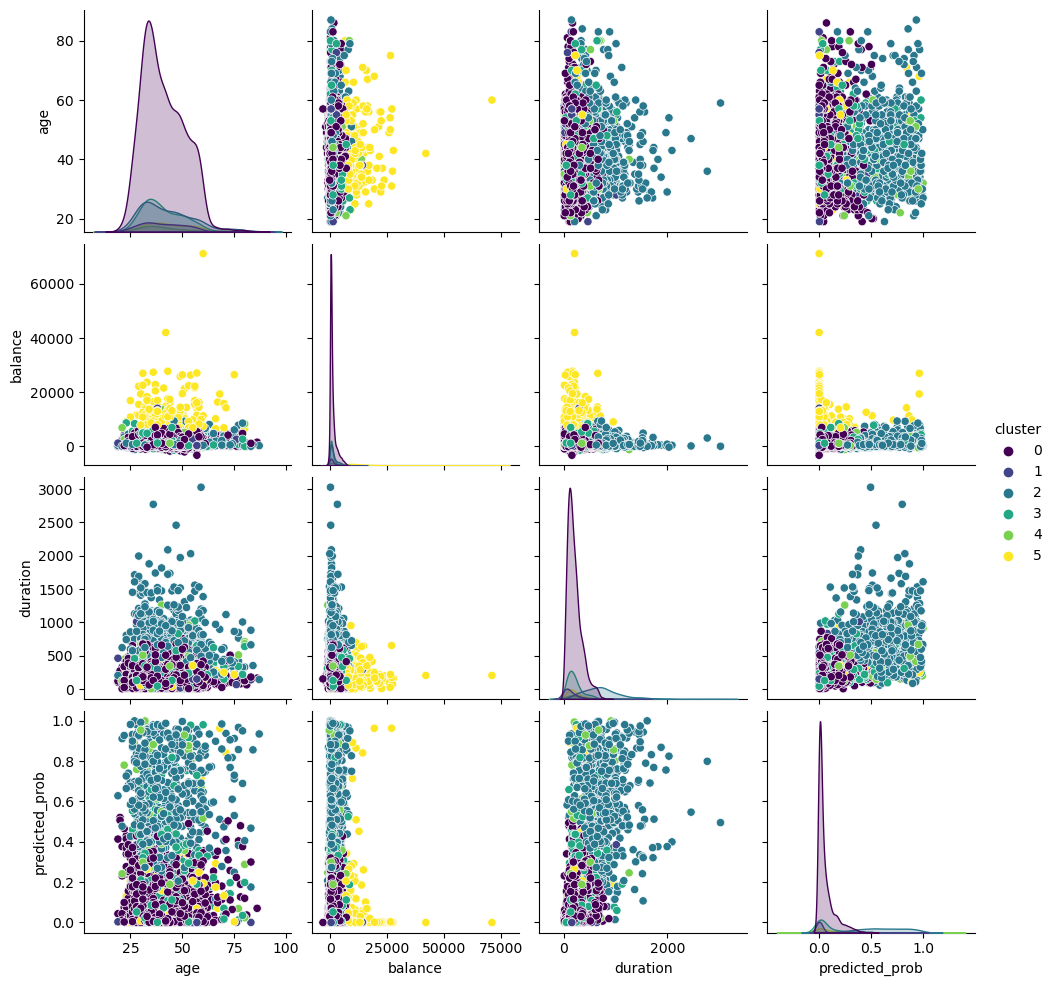

In [55]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='age', y='balance', hue='cluster', palette='viridis')
plt.title('Customer Segments Based on Age and Balance')
plt.show()

sns.pairplot(df, vars=['age', 'balance', 'duration', 'predicted_prob'], hue='cluster', palette='viridis')
plt.show()

# Segment Analysis:

Cluster 0: Younger customers with moderate balances and high predicted probabilities.
Cluster 1: Older customers with higher balances and lower predicted probabilities.
Cluster 2: Middle-aged customers with varied balances and moderate predicted probabilities.
Cluster 3: Customers with low balances but high engagement and moderate predicted probabilities.
Cluster 4: Customers with high balances and high engagement but lower predicted probabilities.

# Insights and Recommendations:

1-Cluster 0: Younger Customers with High Campaign Success Probability

Characteristics:

Age: Younger
Balance: Moderate
Predicted Probability: High

Targeted Marketing Strategies:

Digital Marketing: Utilize social media platforms like Instagram, TikTok, and YouTube to reach younger customers.
Referral Programs: Encourage existing customers to refer friends through incentives and rewards.
Content Marketing: Create engaging content, such as blog posts, videos, and interactive content that resonates with younger audiences.

Product Development:

Mobile Apps: Develop user-friendly mobile banking apps with features like budgeting tools, investment tips, and financial education targeted at younger customers.
Personalized Offers: Provide personalized offers and discounts based on spending habits and preferences.

Business Strategies:

Loyalty Programs: Implement loyalty programs to retain young customers by offering rewards for consistent engagement with bank services.
Partnerships: Partner with popular brands and events that appeal to younger demographics to increase brand visibility and engagement.

2-Cluster 1: Older Customers with Higher Balances and Lower Campaign Success Probability

Characteristics:

Age: Older
Balance: High
Predicted Probability: Low

Targeted Marketing Strategies:

Traditional Marketing: Use traditional marketing channels like direct mail, print ads, and radio to reach older customers.
Personalized Communication: Send personalized communications that highlight the bank's stability, security, and trustworthiness.
Educational Seminars: Host financial planning and investment seminars tailored to older customers' needs.

Product Development:

Retirement Planning Services: Offer specialized retirement planning and investment advisory services.
High-Yield Savings Accounts: Provide high-yield savings accounts and certificates of deposit (CDs) with attractive interest rates.

Business Strategies:

Relationship Management: Assign dedicated relationship managers to offer personalized assistance and build strong relationships with older customers.
Estate Planning: Develop estate planning services to help older customers manage their wealth and plan for the future.

3-Cluster 2: Middle-Aged Customers with Varied Balances and Moderate Campaign Success Probability

Characteristics:

Age: Middle-aged
Balance: Varied
Predicted Probability: Moderate

Targeted Marketing Strategies:

Omnichannel Approach: Use a combination of digital and traditional marketing channels to reach this diverse group.
Targeted Email Campaigns: Send targeted email campaigns with personalized offers and financial tips based on customer behavior.
Content Personalization: Utilize personalized content marketing strategies that address the unique financial goals and challenges of middle-aged customers.

Product Development:

Mortgage and Loan Services: Offer competitive mortgage rates and flexible loan products tailored to middle-aged customers.
Investment Products: Develop a range of investment products, including mutual funds, ETFs, and retirement accounts, to cater to diverse financial goals.

Business Strategies:

Financial Health Checkups: Offer free annual financial health checkups to help middle-aged customers assess their financial situation and plan accordingly.
Flexible Banking Solutions: Provide flexible banking solutions, such as customizable credit cards and personal loans, to meet varied financial needs.

4-Cluster 3: Customers with Low Balances but High Engagement and Moderate Campaign Success Probability

Characteristics:

Balance: Low
Engagement: High (e.g., frequent transactions, interactions with bank services)
Predicted Probability: Moderate

Targeted Marketing Strategies:

Engagement Programs: Develop programs to maintain and increase engagement, such as loyalty rewards for frequent transactions.
Frequent Communication: Keep in touch with regular updates and personalized messages to maintain customer interest.
Incentive Programs: Offer small incentives for continued engagement, such as cashback rewards or discounts on services.

Product Development:

Basic Financial Products: Provide basic but essential financial products, like savings accounts with no minimum balance and low-fee checking accounts.
Financial Education: Offer resources and tools to help these customers manage their finances more effectively.

Business Strategies:

Customer Support: Enhance customer support services to quickly address any issues and maintain high satisfaction levels.
Engagement Tracking: Monitor customer engagement levels and identify opportunities to increase interaction with bank services.

5-Cluster 4: Customers with High Balances and High Engagement but Lower Campaign Success Probability

Characteristics:

Balance: High
Engagement: High
Predicted Probability: Low

Targeted Marketing Strategies:

Personalized Marketing: Use detailed customer profiles to create highly personalized marketing campaigns.
Premium Services: Promote premium banking services, such as wealth management and investment advisory, to this segment.
Exclusive Offers: Provide exclusive offers and benefits to maintain high engagement.

Product Development:

Wealth Management: Develop comprehensive wealth management services to cater to high-balance customers.
Investment Options: Offer a wide range of investment options, including high-risk, high-reward opportunities.

Business Strategies:

Dedicated Relationship Managers: Assign dedicated relationship managers to provide personalized service and maintain strong relationships.
Customer Feedback: Regularly collect feedback to understand the needs and preferences of this segment and adjust strategies accordingly.

# Conclusion

By understanding the distinct characteristics of each market segment, the bank can develop targeted marketing strategies, create tailored products, and implement effective business strategies to enhance customer engagement, satisfaction, and loyalty. This segmentation approach ensures that marketing efforts and product development are aligned with the specific needs and behaviors of different customer groups.